In [1]:
#import dataset
import pandas as pd
import numpy as np
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
#data preprocessing
from sklearn.preprocessing import LabelEncoder
#treating outlier
from scipy import stats
# interactive data visualization library
import plotly.express  as px 

# 1: Data Collection and Reading

In [2]:
data = pd.read_excel("Agri_data_Combined.xlsx")

In [3]:
data.head()

,CountryName,Item,Year,Hg_yield,Average_rain_fall_mm_per_year,Pesticides_tonnes,Avg_temp,GDP,Agriculture_Forestry_Fishing_%GDP,Population_Total,Rural_Population _%TotalPopulation,LaborForce_Total,Male_Employment),Female_Employment,AgriculturalLand_sq_km,AgriculturalLand_%landarea,Arable_land,Fertilizer_Consumption,Cereal_Yield
0,Albania,Maize,1990,36613,1485,121.0,16.37,2.028554e+09,NaN,3286542,63.572,1374478,NaN,NaN,11210.0,40.912409,0.176173,176.165803,2794.4
1,Albania,Potatoes,1990,66667,1485,121.0,16.37,2.028554e+09,NaN,3286542,63.572,1374478,NaN,NaN,11210.0,40.912409,0.176173,176.165803,2794.4
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37,2.028554e+09,NaN,3286542,63.572,1374478,NaN,NaN,11210.0,40.912409,0.176173,176.165803,2794.4
3,Albania,Sorghum,1990,12500,1485,121.0,16.37,2.028554e+09,NaN,3286542,63.572,1374478,NaN,NaN,11210.0,40.912409,0.176173,176.165803,2794.4
4,Albania,Soybeans,1990,7000,1485,121.0,16.37,2.028554e+09,NaN,3286542,63.572,1374478,NaN,NaN,11210.0,40.912409,0.176173,176.165803,2794.4


In [4]:
data.shape#no:of rows and coloumns

(27228, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27228 entries, 0 to 27227
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CountryName                          27228 non-null  object 
 1   Item                                 27228 non-null  object 
 2   Year                                 27228 non-null  int64  
 3   Hg_yield                             27228 non-null  int64  
 4   Average_rain_fall_mm_per_year        27228 non-null  int64  
 5   Pesticides_tonnes                    27228 non-null  float64
 6   Avg_temp                             27228 non-null  float64
 7   GDP                                  27159 non-null  float64
 8   Agriculture_Forestry_Fishing_%GDP    26061 non-null  float64
 9   Population_Total                     27228 non-null  int64  
 10  Rural_Population _%TotalPopulation   27228 non-null  float64
 11  LaborForce_Total            

In [6]:
data.columns

Index(['CountryName', 'Item', 'Year', 'Hg_yield',
       'Average_rain_fall_mm_per_year', 'Pesticides_tonnes', 'Avg_temp',
       'GDP ', 'Agriculture_Forestry_Fishing_%GDP', 'Population_Total ',
       'Rural_Population _%TotalPopulation ', 'LaborForce_Total ',
       'Male_Employment) ', 'Female_Employment', 'AgriculturalLand_sq_km',
       'AgriculturalLand_%landarea ', 'Arable_land  ',
       'Fertilizer_Consumption  ', 'Cereal_Yield'],
      dtype='object')

In [7]:
#Renaming column names
data.rename(columns = {'CountryName':'Country'}, inplace = True)
data.rename(columns = {'GDP ':'GDP'}, inplace = True)
data.rename(columns = {'Population_Total ':'Population_Total'}, inplace = True)
data.rename(columns = {'Male_Employment) ':'Male_Employment'}, inplace = True)
data.rename(columns = {'AgriculturalLand_%landarea ':'AgriculturalLand_%landarea'}, inplace = True)
data.rename(columns = {'Arable_land  ':'Arable_land'}, inplace = True)
data.rename(columns = {'Fertilizer_Consumption  ':'Fertilizer_Consumption'}, inplace = True)
data.rename(columns = {'Rural_Population _%TotalPopulation ':'Rural_Population _%TotalPopulation'}, inplace = True)
data.rename(columns = {'LaborForce_Total ':'LaborForce_Total'}, inplace = True)

In [8]:
data.columns

Index(['Country', 'Item', 'Year', 'Hg_yield', 'Average_rain_fall_mm_per_year',
       'Pesticides_tonnes', 'Avg_temp', 'GDP',
       'Agriculture_Forestry_Fishing_%GDP', 'Population_Total',
       'Rural_Population _%TotalPopulation', 'LaborForce_Total',
       'Male_Employment', 'Female_Employment', 'AgriculturalLand_sq_km',
       'AgriculturalLand_%landarea', 'Arable_land', 'Fertilizer_Consumption',
       'Cereal_Yield'],
      dtype='object')

# 2: Pre-Processing

# 2.1: Missing Value Handling

In [9]:
data.isna().sum()#using boolean sum. isna() gives back true or false value. By sum() we get number of null values.

Country                                  0
Item                                     0
Year                                     0
Hg_yield                                 0
Average_rain_fall_mm_per_year            0
Pesticides_tonnes                        0
Avg_temp                                 0
GDP                                     69
Agriculture_Forestry_Fishing_%GDP     1167
Population_Total                         0
Rural_Population _%TotalPopulation       0
LaborForce_Total                         0
Male_Employment                       1125
Female_Employment                     1125
AgriculturalLand_sq_km                   0
AgriculturalLand_%landarea               0
Arable_land                              0
Fertilizer_Consumption                 515
Cereal_Yield                            29
dtype: int64

In [10]:
#missing data percentage
total = data.isna().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
percent = percent*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total','percent'])
missing_data.head(20)

,Total,percent
Agriculture_Forestry_Fishing_%GDP,1167,4.286029
Female_Employment,1125,4.131776
Male_Employment,1125,4.131776
Fertilizer_Consumption,515,1.891435
GDP,69,0.253416
Cereal_Yield,29,0.106508
LaborForce_Total,0,0.000000
Arable_land,0,0.000000
AgriculturalLand_%landarea,0,0.000000
AgriculturalLand_sq_km,0,0.000000


In [11]:

data= data.dropna(subset=['Cereal_Yield','GDP','Fertilizer_Consumption'])
# filling missing values using forward and backward fill
data=data.fillna(method='ffill').fillna(method='bfill')


In [12]:
data.dropna(inplace=True)

In [13]:
data.isna().sum()

Country                               0
Item                                  0
Year                                  0
Hg_yield                              0
Average_rain_fall_mm_per_year         0
Pesticides_tonnes                     0
Avg_temp                              0
GDP                                   0
Agriculture_Forestry_Fishing_%GDP     0
Population_Total                      0
Rural_Population _%TotalPopulation    0
LaborForce_Total                      0
Male_Employment                       0
Female_Employment                     0
AgriculturalLand_sq_km                0
AgriculturalLand_%landarea            0
Arable_land                           0
Fertilizer_Consumption                0
Cereal_Yield                          0
dtype: int64

In [14]:
data.shape

(26615, 19)

In [15]:
data.nunique()#count unique values in each column

Country                                  94
Item                                     10
Year                                     23
Hg_yield                              10775
Average_rain_fall_mm_per_year            93
Pesticides_tonnes                      1551
Avg_temp                               1762
GDP                                    2052
Agriculture_Forestry_Fishing_%GDP      1912
Population_Total                       2051
Rural_Population _%TotalPopulation     2022
LaborForce_Total                       2052
Male_Employment                        1706
Female_Employment                      1588
AgriculturalLand_sq_km                 1820
AgriculturalLand_%landarea             1864
Arable_land                            2052
Fertilizer_Consumption                 2026
Cereal_Yield                           2020
dtype: int64

In [16]:
data.Country.unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus',
       'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Canada', 'Central African Republic',
       'Chile', 'Colombia', 'Croatia', 'Denmark', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Eritrea', 'Estonia', 'Finland',
       'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq',
       'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritius', 'Mexico', 'Montenegro', 'Morocco',
       'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Niger', 'Norway', 'Pakistan', 'Papua New Guinea',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda',
       'Saudi Arabia', 'S

In [17]:
data.Country.value_counts()

India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Japan          966
              ... 
Estonia         36
Latvia          36
Belgium         33
Sudan           28
Montenegro      24
Name: Country, Length: 94, dtype: int64

In [18]:
data.Item.unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Yams', 'Plantains and others'],
      dtype=object)

In [19]:
data.Item.value_counts()#check count of each Item

Potatoes                3998
Maize                   3837
Wheat                   3611
Rice, paddy             3176
Soybeans                3052
Sorghum                 2849
Sweet potatoes          2767
Cassava                 1997
Yams                     799
Plantains and others     529
Name: Item, dtype: int64

In [20]:
data.Year.unique()                                                           

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013], dtype=int64)

In [21]:
data.Average_rain_fall_mm_per_year.unique()

array([1485,   89, 1010,  591,  562,  534, 1110,  447, 2666,  618,  847,
        416, 1761,  608,  748, 1274, 1604,  537, 1342, 1522, 3240, 1113,
        703, 1410, 2274, 1784,  383,  626,  536,  867,  700, 1187,  652,
       1996, 1651, 2387, 1976,  589, 1083, 2702,  216, 1118,  832, 2051,
       1668,  250,  630,  641,  661,   56,  656, 1513, 1181, 2875,  282,
       2041,  758,  241,  346, 1032,  285, 1500,  778, 1732, 2280,  151,
       1414,  494, 3142, 1738,  600,  854,   74,  637, 1212,   59,  686,
       1162,  495,  636, 1712, 2331,  624, 1537,  691, 1622,  207, 1180,
        565, 1220, 1300, 1020,  657], dtype=int64)

In [22]:
corr = data.corr()#to find the correlation among the columns.
corr

,Year,Hg_yield,Average_rain_fall_mm_per_year,Pesticides_tonnes,Avg_temp,GDP,Agriculture_Forestry_Fishing_%GDP,Population_Total,Rural_Population _%TotalPopulation,LaborForce_Total,Male_Employment,Female_Employment,AgriculturalLand_sq_km,AgriculturalLand_%landarea,Arable_land,Fertilizer_Consumption,Cereal_Yield
Year,1.000000,0.091492,-0.005210,0.141782,0.008646,0.228548,-0.198824,0.057900,-0.098954,0.079910,-0.080686,-0.028717,-0.020225,-0.011767,-0.045410,0.107616,0.231169
Hg_yield,0.091492,1.000000,0.005554,0.063227,-0.115885,0.211129,-0.189880,0.030196,-0.177652,0.039449,-0.201976,-0.168962,0.052347,0.000798,-0.019816,0.177555,0.274315
Average_rain_fall_mm_per_year,-0.005210,0.005554,1.000000,0.169563,0.324548,0.073781,0.058912,-0.015454,0.029038,0.010040,0.145106,-0.041323,-0.133468,-0.368015,-0.395971,0.319087,0.252721
Pesticides_tonnes,0.141782,0.063227,0.169563,1.000000,0.037821,0.422820,-0.275118,0.146701,-0.365712,0.179189,-0.255211,-0.265163,0.452892,-0.176905,-0.009941,0.176376,0.218408
Avg_temp,0.008646,-0.115885,0.324548,0.037821,1.000000,-0.217068,0.461882,0.395827,0.494484,0.389667,0.540048,0.449376,0.125536,0.044097,-0.379991,-0.095578,-0.350450
GDP,0.228548,0.211129,0.073781,0.422820,-0.217068,1.000000,-0.371772,0.160027,-0.361755,0.200062,-0.380393,-0.279646,0.094499,-0.231067,-0.114575,0.283742,0.560192
Agriculture_Forestry_Fishing_%GDP,-0.198824,-0.189880,0.058912,-0.275118,0.461882,-0.371772,1.000000,0.300917,0.843508,0.270528,0.798484,0.787895,-0.146826,0.163689,-0.153439,-0.267378,-0.473752
Population_Total,0.057900,0.030196,-0.015454,0.146701,0.395827,0.160027,0.300917,1.000000,0.436774,0.997506,0.338505,0.464475,0.413889,0.293556,-0.220266,0.013781,-0.087117
Rural_Population _%TotalPopulation,-0.098954,-0.177652,0.029038,-0.365712,0.494484,-0.361755,0.843508,0.436774,1.000000,0.407930,0.826623,0.864335,-0.180484,0.268110,-0.255382,-0.248277,-0.449227
LaborForce_Total,0.079910,0.039449,0.010040,0.179189,0.389667,0.200062,0.270528,0.997506,0.407930,1.000000,0.319580,0.441485,0.423674,0.270722,-0.223179,0.030425,-0.057972


<AxesSubplot:>

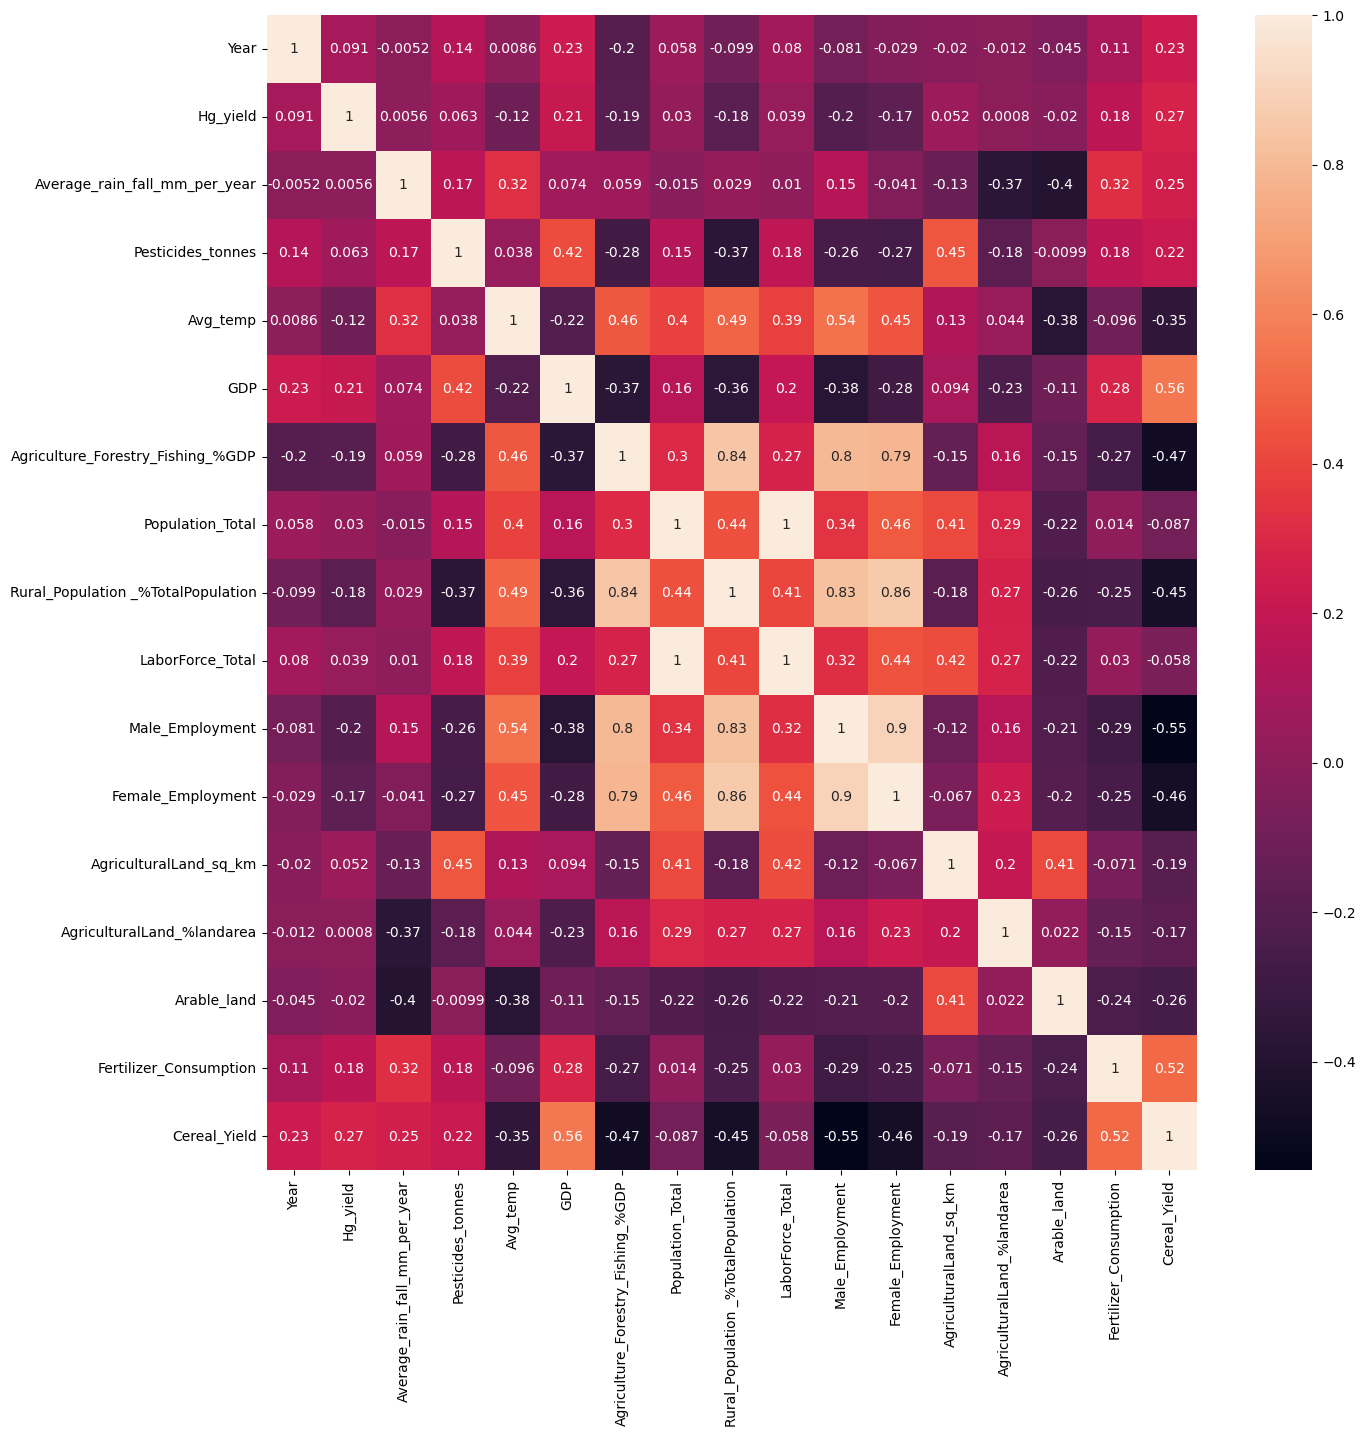

In [23]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(),annot = True)

In [24]:
data.describe()

,Year,Hg_yield,Average_rain_fall_mm_per_year,Pesticides_tonnes,Avg_temp,GDP,Agriculture_Forestry_Fishing_%GDP,Population_Total,Rural_Population _%TotalPopulation,LaborForce_Total,Male_Employment,Female_Employment,AgriculturalLand_sq_km,AgriculturalLand_%landarea,Arable_land,Fertilizer_Consumption,Cereal_Yield
count,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,2.661500e+04,26615.000000,2.661500e+04,26615.000000,2.661500e+04,26615.000000,26615.000000,2.661500e+04,26615.000000,26615.000000,26615.000000,26615.000000
mean,2001.561788,77205.538305,1184.089724,38460.122791,20.591266,6.181974e+11,12.916387,2.197007e+08,45.212729,8.304469e+07,31.769375,33.418021,8.761913e+05,45.339646,0.289693,125.012142,2876.303964
std,7.044998,85225.138680,707.718164,61371.219837,6.335158,1.022476e+12,10.311875,3.748762e+08,23.693506,1.360620e+08,21.504591,30.994588,1.033685e+06,19.440537,0.323422,154.055406,1496.266192
min,1990.000000,50.000000,56.000000,0.040000,1.300000,3.485331e+08,0.094196,4.127560e+05,1.215000,1.262800e+05,0.460000,0.010000,6.100000e+02,0.448718,0.008401,0.005017,152.600000
25%,1995.000000,19690.000000,608.000000,1844.000000,16.800000,2.860792e+10,3.955399,1.383605e+07,22.848000,5.490081e+06,12.240000,5.570000,8.711200e+04,28.104339,0.127731,57.003546,1928.700000
50%,2001.000000,37669.000000,1083.000000,18025.000000,21.690000,2.421869e+11,9.355656,4.431392e+07,43.248000,1.928934e+07,29.770000,18.010000,3.666900e+05,47.680573,0.194824,97.316029,2580.800000
75%,2008.000000,106678.000000,1668.000000,51435.130000,26.020000,7.091485e+11,21.287195,1.758737e+08,68.923000,7.022161e+07,48.570000,67.930000,1.797570e+06,60.563906,0.282356,156.495698,3553.100000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000,6.272363e+12,53.380922,1.291132e+09,94.584000,4.765742e+08,91.570000,96.849998,4.691430e+06,85.487373,2.194990,2299.421663,9710.000000


In [25]:
data.describe(include="object").T

,count,unique,top,freq
Country,26615,94,India,4048
Item,26615,10,Potatoes,3998


# 2.2 Outlier Detection and Handling

<function matplotlib.pyplot.show(close=None, block=None)>

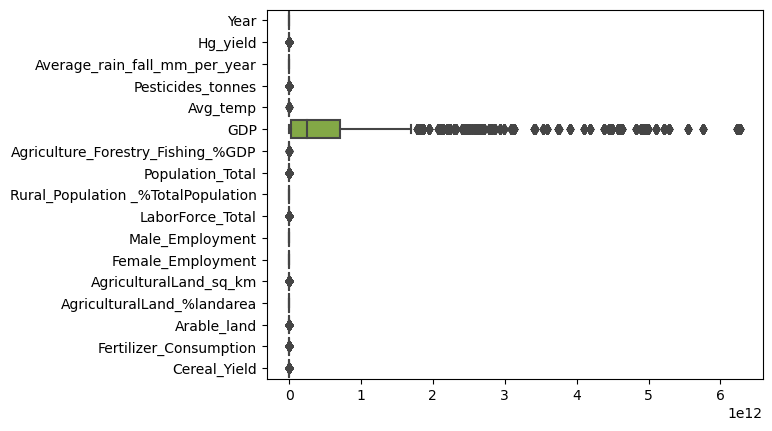

In [26]:
sns.boxplot(data=data,orient='h')
plt.show

In [27]:
out=['Hg_yield','Pesticides_tonnes','Avg_temp','GDP','Agriculture_Forestry_Fishing_%GDP',
     'Population_Total','LaborForce_Total','AgriculturalLand_sq_km','Arable_land',
     'Fertilizer_Consumption','Cereal_Yield']
ind1,ind2,i1,i2=[],[],[],[]

for i in out:
    print('Handling Outliers in',i.upper(),'COLUMN: \n')
    Q1=np.percentile(data[i],25,interpolation='midpoint')
    Q2=np.percentile(data[i],50,interpolation='midpoint')
    Q3=np.percentile(data[i],75,interpolation='midpoint')

    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    
    print('The values below',low_lim,'and above',up_lim,'are outliers.')
    
    outlier=[]
    for x in data[i]:
        if x > up_lim or x < low_lim:
            outlier.append(x)
            
    print('There are',len(outlier),'outliers in',i,'column.')
            
    ind1,ind2=data[i] > up_lim, data[i]
    i1=data.loc[ind1].index

    data.drop(i1,inplace=True)
    
    print('Shape of dataset after removal of outliers in',i.upper(),'column:',data.shape,'\n\n')

Handling Outliers in HG_YIELD COLUMN: 

The values below -110792.0 and above 237160.0 are outliers.
There are 1808 outliers in Hg_yield column.
Shape of dataset after removal of outliers in HG_YIELD column: (24807, 19) 


Handling Outliers in PESTICIDES_TONNES COLUMN: 

The values below -70367.5 and above 121732.5 are outliers.
There are 1337 outliers in Pesticides_tonnes column.
Shape of dataset after removal of outliers in PESTICIDES_TONNES column: (23470, 19) 


Handling Outliers in AVG_TEMP COLUMN: 

The values below 3.030000000000001 and above 39.91 are outliers.
There are 49 outliers in Avg_temp column.
Shape of dataset after removal of outliers in AVG_TEMP column: (23470, 19) 


Handling Outliers in GDP COLUMN: 

The values below -733540741515.9587 and above 1280716207075.5627 are outliers.
There are 2468 outliers in GDP column.
Shape of dataset after removal of outliers in GDP column: (21002, 19) 


Handling Outliers in AGRICULTURE_FORESTRY_FISHING_%GDP COLUMN: 

The values bel

# 2.4: Standardization/Normalization

In [28]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()

# 3: Exploratory Data Analysis (EDA)

                      Item
Maize                 1916
Wheat                 1737
Rice, paddy           1688
Sorghum               1647
Potatoes              1617
Soybeans              1395
Sweet potatoes        1341
Cassava                927
Plantains and others   441
Yams                   366


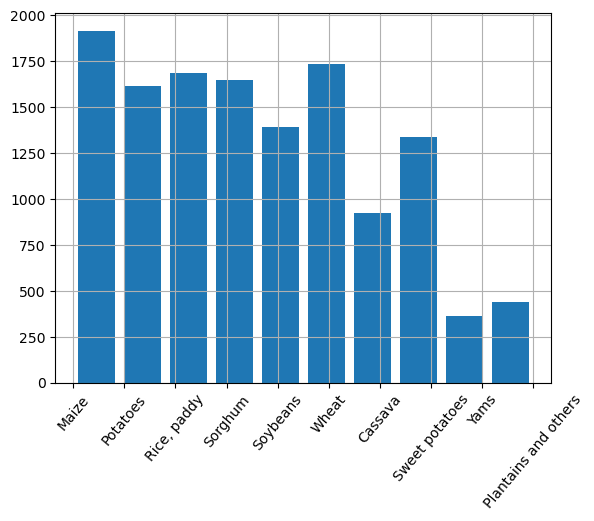

In [29]:
print(data['Item'].value_counts().to_frame())
plt.hist(data['Item'],rwidth=.8)
plt.xticks(rotation=50)
plt.grid()
plt.show()

C:\Users\AbinPC\AppData\Local\Temp\ipykernel_20052\2654781816.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


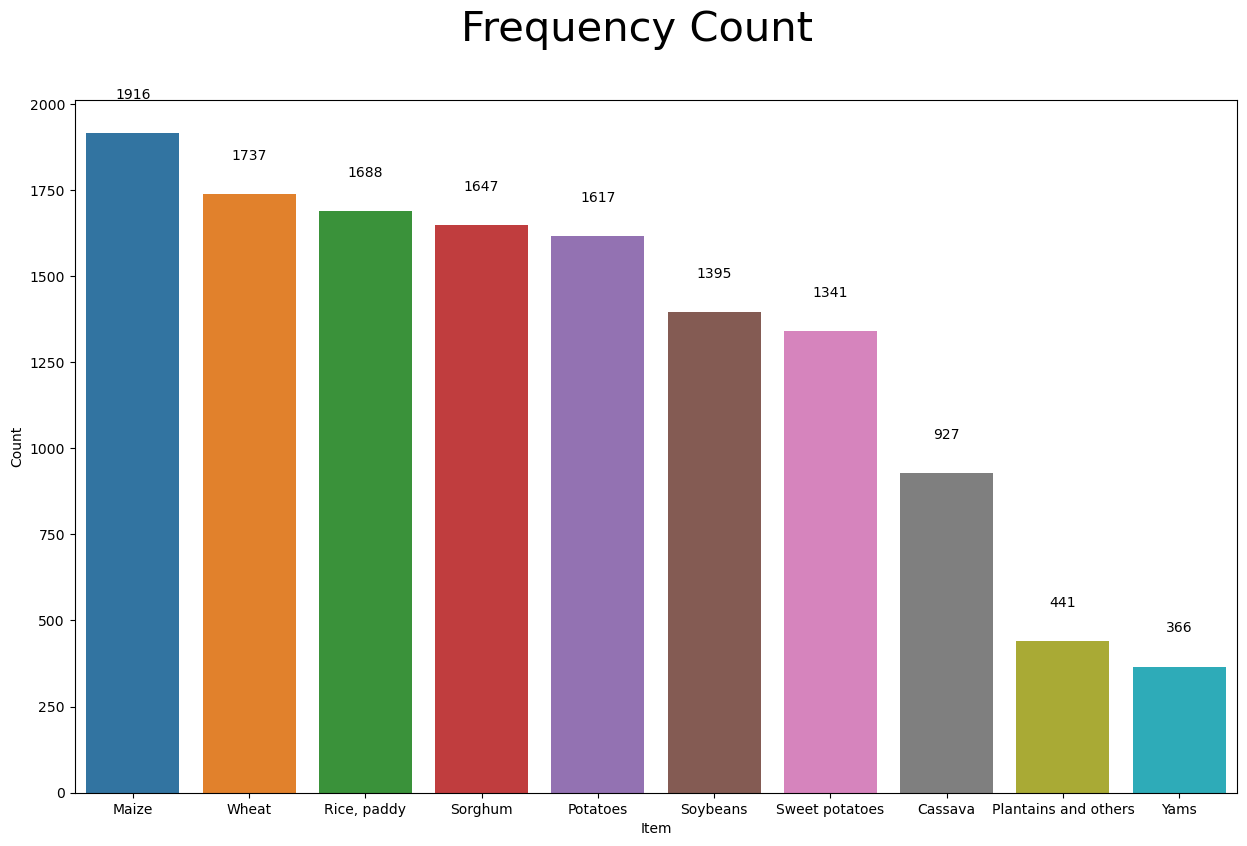

In [30]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 100, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

Item
Potatoes                30.680861
Sweet potatoes          18.550940
Cassava                 11.682227
Rice, paddy              8.110525
Maize                    7.524671
Wheat                    5.996559
Plantains and others     5.765799
Yams                     5.037989
Sorghum                  3.948626
Soybeans                 2.701804
Name: Hg_yield, dtype: float64


Text(0.5, 1.0, 'Total Yield Percentage of Each Crop')

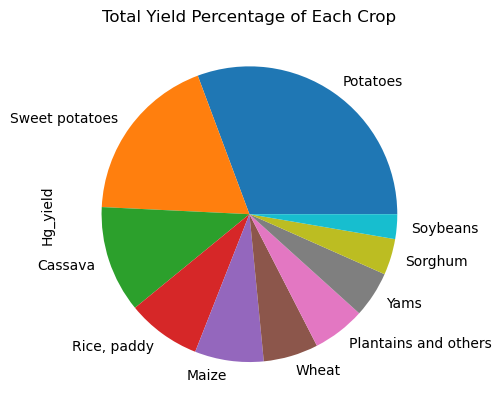

In [31]:
#Plot yield percentage of each crop
total_yield=data.groupby('Item')['Hg_yield'].sum().sort_values(ascending=False)
total = data.Hg_yield.sum()
percent = (total_yield/total).sort_values(ascending=False)
percent = percent*100
print(percent)
percent.plot.pie().set_title('Total Yield Percentage of Each Crop') 

Text(0.5, 1.0, 'Country-wise Average Rainfall')

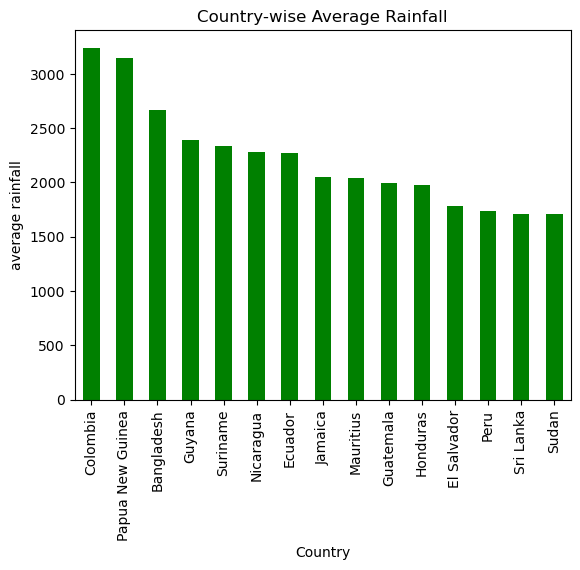

In [32]:
#average rainfall of each country
total_rainfall=data.groupby('Country')['Average_rain_fall_mm_per_year'].mean().sort_values(ascending=False).head(15)
total_rainfall.plot.bar(ylabel="average rainfall",color="green").set_title('Country-wise Average Rainfall') 

Text(0.5, 1.0, 'Average temperature per crop')

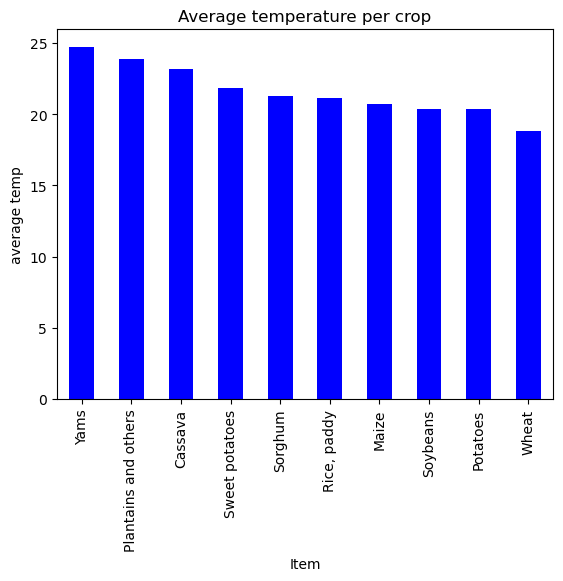

In [33]:
#average temperature of each crop
total_temp=data.groupby(['Item'])['Avg_temp'].mean().sort_values(ascending=False)
total_temp.plot.bar(ylabel="average temp",color="blue").set_title('Average temperature per crop') 

<AxesSubplot:xlabel='Item', ylabel='Female employment'>

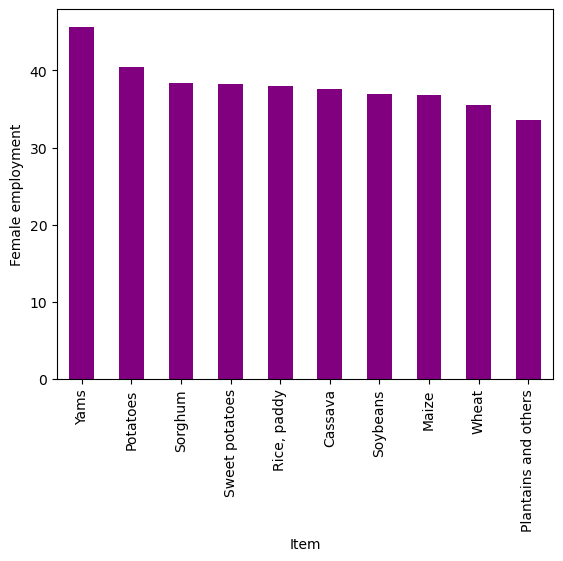

In [34]:
#average employment percentage of each crop
total_emp2=data.groupby(['Item'])['Female_Employment'].mean().sort_values(ascending=False)
total_emp2.plot.bar(ylabel="Female employment",color="purple")

In [35]:
#yearwise yield of each item per Country
sns.set(rc={'figure.figsize':(15.7,5.27)})
av=data.groupby(['Country','Year','Item'])['Hg_yield'].mean()
av = pd.DataFrame(av)
av = av.sort_values(by=['Country','Year','Hg_yield'], ascending=False)
av.head(20)

Hg_yield
Country  Year Item                    
Zimbabwe 2013 Potatoes        165714.0
              Cassava          46000.0
              Wheat            22888.0
              Rice, paddy      22581.0
              Sweet potatoes   22222.0
              Soybeans         13142.0
              Maize             7449.0
              Sorghum           3066.0
         2012 Potatoes        171875.0
              Cassava          47010.0
              Wheat            24420.0
              Rice, paddy      22581.0
              Sweet potatoes   22222.0
              Soybeans         15300.0
              Maize             7912.0
              Sorghum           2046.0
         2011 Potatoes        167336.0
              Cassava          45589.0
              Wheat            26274.0
              Rice, paddy      22704.0

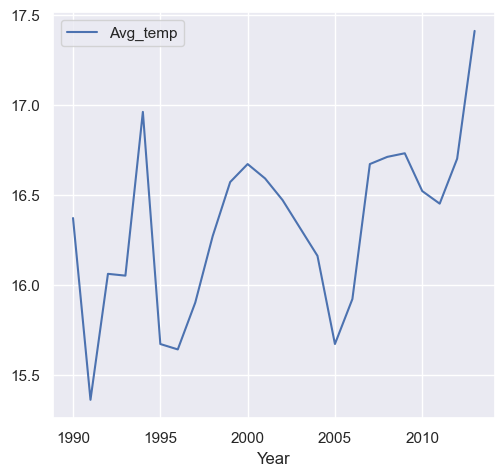

In [36]:
sns.set(rc={'figure.figsize':(5.7,5.27)})
data[['Avg_temp','Year','Country']].loc[data['Country'] == 'Albania'].groupby('Year').mean().plot()
plt.show()

# 4.Modeling

In [37]:
data.columns

Index(['Country', 'Item', 'Year', 'Hg_yield', 'Average_rain_fall_mm_per_year',
       'Pesticides_tonnes', 'Avg_temp', 'GDP',
       'Agriculture_Forestry_Fishing_%GDP', 'Population_Total',
       'Rural_Population _%TotalPopulation', 'LaborForce_Total',
       'Male_Employment', 'Female_Employment', 'AgriculturalLand_sq_km',
       'AgriculturalLand_%landarea', 'Arable_land', 'Fertilizer_Consumption',
       'Cereal_Yield'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13075 entries, 0 to 27227
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             13075 non-null  object 
 1   Item                                13075 non-null  object 
 2   Year                                13075 non-null  int64  
 3   Hg_yield                            13075 non-null  int64  
 4   Average_rain_fall_mm_per_year       13075 non-null  int64  
 5   Pesticides_tonnes                   13075 non-null  float64
 6   Avg_temp                            13075 non-null  float64
 7   GDP                                 13075 non-null  float64
 8   Agriculture_Forestry_Fishing_%GDP   13075 non-null  float64
 9   Population_Total                    13075 non-null  int64  
 10  Rural_Population _%TotalPopulation  13075 non-null  float64
 11  LaborForce_Total                    13075

In [39]:
#Encoding
#Except the target column (winner), all other features are to encoded

from sklearn.preprocessing import LabelEncoder
class_en = LabelEncoder()
data['Country']=class_en.fit_transform(data['Country'])
data['Item']=class_en.fit_transform(data['Item'])

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13075 entries, 0 to 27227
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             13075 non-null  int32  
 1   Item                                13075 non-null  int32  
 2   Year                                13075 non-null  int64  
 3   Hg_yield                            13075 non-null  int64  
 4   Average_rain_fall_mm_per_year       13075 non-null  int64  
 5   Pesticides_tonnes                   13075 non-null  float64
 6   Avg_temp                            13075 non-null  float64
 7   GDP                                 13075 non-null  float64
 8   Agriculture_Forestry_Fishing_%GDP   13075 non-null  float64
 9   Population_Total                    13075 non-null  int64  
 10  Rural_Population _%TotalPopulation  13075 non-null  float64
 11  LaborForce_Total                    13075

In [60]:
# Droping address column
data = data.drop(['Year'],axis=1)
data.head()

,Country,Item,Hg_yield,Average_rain_fall_mm_per_year,Pesticides_tonnes,Avg_temp,GDP,Agriculture_Forestry_Fishing_%GDP,Population_Total,Rural_Population _%TotalPopulation,LaborForce_Total,Male_Employment,Female_Employment,AgriculturalLand_sq_km,AgriculturalLand_%landarea,Arable_land,Fertilizer_Consumption,Cereal_Yield
0,0,1,36613,1485,121.0,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
1,0,3,66667,1485,121.0,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
2,0,4,23333,1485,121.0,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
3,0,5,12500,1485,121.0,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4
4,0,6,7000,1485,121.0,16.37,2.028554e+09,36.410864,3286542,63.572,1374478,51.610001,66.160004,11210.0,40.912409,0.176173,176.165803,2794.4


In [41]:
# Splitting the dataset into features and target set.
x=data.drop(['Cereal_Yield'],axis=1)
y=pd.DataFrame(data['Cereal_Yield'])

# Models: This is classification model to predict Cereal_Yield.
Logisitic regression, k-NN, SVM(radial and polynomial), Decision Tree

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [62]:
x_train.head()

,Country,Item,Year,Hg_yield,Average_rain_fall_mm_per_year,Pesticides_tonnes,Avg_temp,GDP,Agriculture_Forestry_Fishing_%GDP,Population_Total,Rural_Population _%TotalPopulation,LaborForce_Total,Male_Employment,Female_Employment,AgriculturalLand_sq_km,AgriculturalLand_%landarea,Arable_land,Fertilizer_Consumption
20698,47,3,2000,96436,1500,111.72,15.13,5.494252e+09,38.243897,24559500,86.603,6018731,66.370003,84.629997,42491.0,29.641437,0.095849,31.016992
7384,17,4,2013,45123,1410,6316.61,26.88,6.268216e+10,5.304866,10157051,23.251,4236156,16.639999,1.560000,23520.0,48.685572,0.078763,79.782500
2166,6,5,2002,12361,2666,2954.29,26.10,5.472408e+10,20.584134,134139826,75.244,49645747,55.060001,76.150002,93530.0,71.852193,0.061525,188.639162
7863,18,4,2008,40639,2274,15396.14,17.16,6.176264e+10,8.965683,14496797,37.700,6561532,31.959999,21.610001,74450.0,29.976647,0.085260,214.119741
6602,14,2,1998,67354,3240,60687.00,27.67,9.844374e+10,13.235790,37944414,26.902,17180006,32.209999,6.700000,455430.0,41.048220,0.067230,233.594669


In [63]:
#Scaling of data
num_cols = ['Country', 'Item','Year','Hg_yield','Average_rain_fall_mm_per_year',
           'Pesticides_tonnes','Avg_temp','GDP','Agriculture_Forestry_Fishing_%GDP','Population_Total','Rural_Population _%TotalPopulation',
           'LaborForce_Total','Male_Employment','Female_Employment','AgriculturalLand_sq_km','AgriculturalLand_%landarea','Arable_land',
           'Fertilizer_Consumption']

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train.loc[:,num_cols] = sc.fit_transform(x_train[num_cols])
x_test.loc[:,num_cols] = sc.fit_transform(x_test[num_cols])

# Model Building

In [66]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [67]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

534540.1454953495
0.5591448939989956


In [68]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
2200,3761.4,2295.689611
102,687.7,3673.008339
327,464.3,1927.882764
2223,4020.9,1379.084513
1940,2593.1,2494.917870


In [70]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred_knn))
print(r2_score(y_test,y_pred_knn))

65921.21145399638
0.9456323291932822


In [72]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred_knn)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
2200,3761.4,2593.200000
102,687.7,3090.000000
327,464.3,2096.933333
2223,4020.9,1419.833333
1940,2593.1,2385.591667


In [73]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=200)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)

C:\Users\AbinPC\AppData\Local\Temp\ipykernel_20052\3479472157.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train, y_train)


In [74]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred_rf))
print(r2_score(y_test,y_pred_rf))

50476.395269779
0.9583702425819005


In [75]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred_rf)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
2200,3761.4,2605.734604
102,687.7,2611.004300
327,464.3,2067.683890
2223,4020.9,1343.620836
1940,2593.1,2214.028109


In [ ]:
#Note:

Random Forest Regressor is having the r2 score value with 0.95 and is comparitively good model.